### CS591-L1 2018-Spring Term Project<br/>Visualization - Surrounding Facilities for Crash Accidents

The following code shows how to generate histogram about gathered information from traffic crash accident dataset.

In our testing some unprecedented result may happen when using graph saving functions in matplot, so we suggest that to save genearted images, just plot on the notebook, right click on the image, then select "save image".

In [1]:
# Library import
# Note that you also need to install 'seaborn' library to support the plot theme used in this code.
import numpy as np
import matplotlib.pyplot as plt
import pymongo
import pandas as pd

In [2]:
# Login mongodb
client = pymongo.MongoClient()
repo = client.repo
repo.authenticate('liwang_pyhsieh', 'liwang_pyhsieh')

True

In [3]:
# Load the dataset and logout
database = [x for x in repo['liwang_pyhsieh.joined_crash_analysis'].find()]
repo.logout() # It's safer to add logout call, although jupyter notebook might not require to do so

/Users/hpy-kenny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Database.logout() is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# 'joined_crash_analysis' collects most of our analysis result.
# If you want to generate graph of other information, just feel free to modify code here and belows.
db_mig = []
for x in database:
    db_mig.append([x["_id"], x["time"].hour, x["accident_density"], x["nearby_lights"], x["nearby_signals"]])
cols = ["_id", "time", "accident_density", "nearby_lights", "nearby_signals"]

df_database = pd.DataFrame.from_records(db_mig, columns=cols, index="_id")


In [5]:
df_database.head()

,time,accident_density,nearby_lights,nearby_signals
_id,,,,
3989560,19,5,0,0
3990982,20,0,0,0
3990983,22,33,3,0
3990985,18,11,0,0
3990987,21,0,2,0


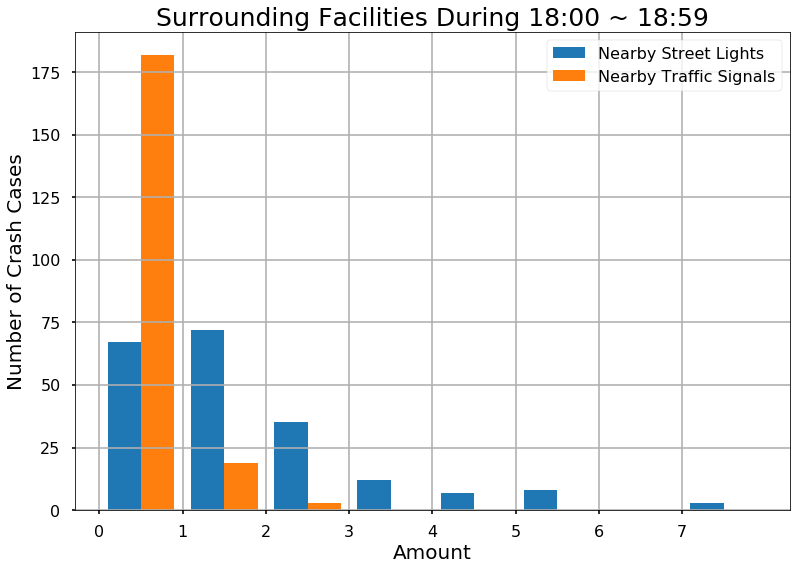

In [8]:
# Plot the histogram. Here we only plot one as an example!

# times = list(range(18, 24)) + list(range(0, 6))
times = [18]
plt.style.use('seaborn-poster')
for t in times:
    df_sample = df_database[df_database["time"] == t]
    sample_l = df_sample["nearby_lights"]
    sample_s = df_sample["nearby_signals"]

    tickmax_l = sample_l.max()
    tickmax_s = sample_s.max()

    tickmax_x = max(tickmax_l, tickmax_s)
    
    plt.hist([df_sample["nearby_lights"], df_sample["nearby_signals"]], bins=range(tickmax_x + 2))
    
    plt.title("Surrounding Facilities During %d:00 ~ %d:59" % (t, t), fontsize=25)
    plt.xlabel("Amount", fontsize=20)
    plt.ylabel("Number of Crash Cases", fontsize=20)
    plt.legend(["Nearby Street Lights", "Nearby Traffic Signals"])
    plt.grid(True)
    plt.xticks(range(tickmax_x + 1))
    plt.show()